<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 3

## Q1: Lag correlations of weather time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

C:\Users\ldanyluk\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

<IPython.core.display.Javascript object>


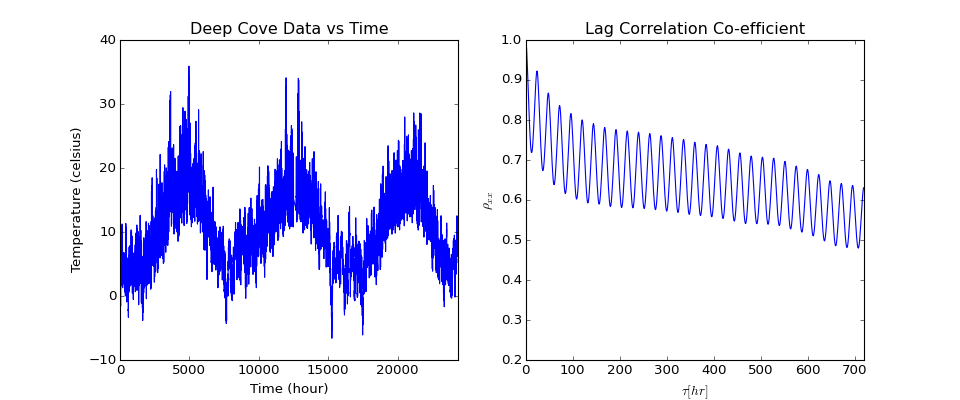

(0, 720)

In [3]:
dc= dc[~np.isnan(dc)]
jb= jb[~np.isnan(jb)]
dclen= len(dc)

# Simple plot of data, without any alterations
t=np.arange(0, dclen,1.0)
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
ax.plot(t,dc)
ax.set_title('Deep Cove Data vs Time')
ax.set_xlabel('Time (hour)')
ax.set_ylabel('Temperature (celsius)')
ax.set_xlim([0.0,dclen])

lag= 30 #days
lag=lag*24 #hours
lags=range(0,lag)
mt= np.mean(dc)
cxx=np.zeros(len(lags))
for ind,tau in enumerate(lags):
    if tau==0:
        cxx[ind]= np.mean(dc-mt*(dc-mt))
    else:
        cxx[ind]= np.mean((dc-mt)[:-tau]*(dc-mt)[tau:])

rhoxx=cxx/np.var(dc-mt)
ax=fig.add_subplot(1,2,2)
ax.plot(lags, rhoxx)
ax.set_title('Lag Correlation Co-efficient')
ax.set_xlabel(r'$\tau[hr]$')
ax.set_ylabel(r'$\rho_{xx}$')
ax.set_xlim([0,720])

The plot appears to have a downward slope,as correlation becomes worse and worse, and there is this somewhat sinusoidal oscillation occuring. This could be because as the lag varies out to 30 days, sometimes the lag is such that it is night(thus cold) when the original is daytimes( thus warmer) causing a lower correlation. Thus as the lag causes days to line up, correlation improves. 

*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.

8520 10680


<IPython.core.display.Javascript object>


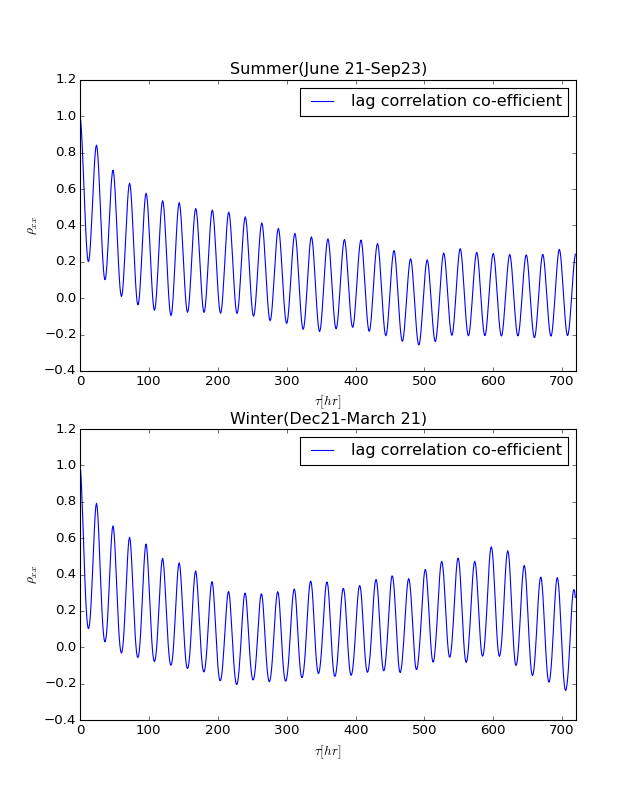

(0, 720)

In [4]:
# looking at the basic plot of the Data, assume Data collection began on January first
# days until summer (for summer starting June 21: 
s=31+28+31+30+31+21
#days until end of summer, Sept 23
ends=s+9+31+31+23
#now convert to hours: 
s=s*24
ends=ends*24
#make a new array for Summer: 
summer=dc[s:ends:]

#now for winter, winter from Dec 21 to March 21: 
#find start of first winter: 
w=ends+(7+31+30+21)*24
#end of winter: 
endw=w+(10+31+28+21)*24
# make winter array
winter= dc[w:endw:]
print w, endw

# now plot them
lagss=range(0, lag)
cxxs=0.*np.array(lagss)
meansum=np.mean(summer)
meanwin=np.mean(winter)
for ind, tau in enumerate(lagss):
    if tau==0:
        cxxs[ind]=np.mean((summer-meansum)**2)/np.var(summer-meansum)
    else:
        cxxs[ind]=np.mean((summer-meansum)[:-1*tau]*(summer-meansum)[tau:])
        cxxs[ind]=cxxs[ind]/np.var(summer-meansum)
rhos=cxxs

fig= plt.figure(figsize=(8,10))
ax=fig.add_subplot(2,1,1)
ax.plot(lagss, rhos, label='lag correlation co-efficient')
ax.set_xlabel(r'$\tau [hr]$')
ax.set_ylabel(r'$\rho_{xx}$')
ax.set_title('Summer(June 21-Sep23)')
ax.legend(loc=0)
ax.set_xlim([0, 720])

lagsw=range(0,lag)
cxxw=0.*np.array(lagsw)
for ind, tau in enumerate(lagsw):
    if tau==0:
        cxxw[ind]=np.mean((winter-meanwin)**2)/np.var(winter-meanwin)
    else: 
        cxxw[ind]=np.mean((winter-meanwin)[:-1*tau]*(winter-meanwin)[tau:]/np.var(winter-meanwin))
rhow=cxxw

ax=fig.add_subplot(2,1,2)
ax.plot(lagsw, rhow, label='lag correlation co-efficient')
ax.set_xlabel(r'$\tau[hr]$')
ax.set_ylabel(r'$\rho_{xx}$')
ax.set_title('Winter(Dec21-March 21)')
ax.legend(loc=0)
ax.set_xlim([0,720])

The Summer plot has a overall decrease in correlation with time, where as the winter correlation gets worse, then better then worse again. 

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

Starting with $R_{xx}$: 
\begin{equation}
    R_{xx}(\tau)= E(x(t)x(t+\tau))\\
    =E ( \int_{t-b}^{t} y(t)dt \int_{t+\tau-b}^{t+\tau} y(t+\tau) d\tau)\\
\end{equation}
Since both the integration and the expectation values are linear operaters, this is equal to: 
\begin{equation}
    =\int_{t-b}^{t} \int_{t+\tau-b}^{t+\tau} E [ y(t)y(t+\tau) ]d\tau dt
\end{equation}
and this expectation value is exactly $R_{yy}$: 
\begin{equation}
    =\int_{t-b}^{t} \int_{t+\tau-b}^{t+\tau} \delta(\tau)d\tau dt\\
\end{equation}
 
 Looking at the bounds of integration, for different values of $\tau$, these bounds may or may not overlap. 
 ie, if $\tau$ > b, or $\tau$ <-b, the two sets of bounds, $(t-b) to t$ and $(t+\tau-b)$ to $(t+\tau)$ do not overlap. Thus the integral of the delta function over the two non-overlapping bounds is zero: $R_{xx}(\tau)=0$ for $|\tau|geq b$. 
 When |\tau| < b, these intervals do overlap, and the overlap is between t and (t+$\tau$-b), and their difference is $b-\tau$. Thus, $R_{xx}(\tau)= b-|\tau|$ for $|\tau|<b$

**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!

<IPython.core.display.Javascript object>


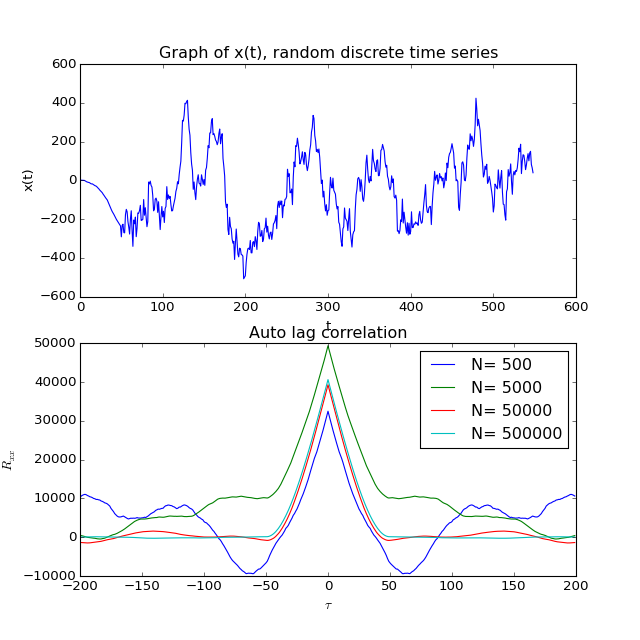





These totally begin to look like a triangle function as N approaches infinity!


In [30]:
def mkRxx(N, fig1,graph=False):
    # make white noise
    y=np.random.randn(N)
    b=50
    barr=np.linspace(0,b-1,b)
    xt=np.convolve(y,barr)
    t=np.linspace(0,len(xt)-1, len(xt))
    if graph==True:
        ax=fig1.add_subplot(2,1,1)
        ax.plot(t,xt)
        ax.set_title('Graph of x(t), random discrete time series')
        ax.set_xlabel('t')
        ax.set_ylabel('x(t)')
    
    #Calculate Rxx(tau)
    
    lags=range(-200, 200)
    rxx=0.*np.array(lags)
    for ind, tau in enumerate(lags):
        if tau<0: 
            rxx[ind]=np.mean(xt[:tau]*xt[-tau:])
        elif tau==0: 
            rxx[ind]=np.mean(xt*xt)
        else: 
            rxx[ind]=np.mean(xt[:-tau]*xt[tau:])
    ax=fig1.add_subplot(2,1,2)
    ax.plot(lags, rxx, label='N= %d'%N)
    ax.set_title('Auto lag correlation')
    ax.set_xlabel(r'$\tau $')
    ax.set_ylabel('$R_{xx}$')
    ax.legend(loc=0)
    print 
fig=plt.figure(figsize=(8,8))
mkRxx(500, fig, graph=True)
mkRxx(5000, fig)
mkRxx(50000, fig)
mkRxx(500000, fig)
print 'These totally begin to look like a triangle function as N approaches infinity!'

**3** Derive (or look up) $S_{xx}(f)$ of this process:


\begin{equation}
    S_{xx}=\int_{-\infty}^{\infty}R_{xx}(\tau) e^{-j 2 \pi f \tau}d\tau \\
    = 0+\int_{-b}^{0}(b+\tau) e^{-j 2 \pi f \tau}d\tau +\int_{0}^{b}(b-\tau) e^{-j 2 \pi f \tau}d\tau +0\\
\end{equation}
the two b terms evaluate to, and letting $c=2 \pi f$: 
\begin{equation}
    jb/c e^{-j c \tau}|_{-b}^{0} + jb/(c) e^{-j c \tau}|_{0}^{b}\\
    =jb/c(1-e^{j c \tau}+ e^{-j c b}-1)\\
    =jb/c[-cos(cb)- j sin(cb)+cos(cb)-j sin(cb)]\\
    =2b/c sin(cb)\\
\end{equation}

the two $\tau$ terms use integration by parts: 
let $u=\tau$, $du=d\tau$, $dv=e^{-jc\tau} d\tau$, $v=j/c e^{-jc\tau}$
\begin{equation}
    [\tau j/c e^{-jc\tau}]_{-b}^{0}-j/c \int_{-b}^{0}e^{-jc\tau}d\tau - [j\tau/c e^{-jc\tau}]_{0}^{b}+ j/c \int_{0}^b{}e^{-jc\tau}d\tau\\
    =j/c[0 + b e^{jcb}]-j/c[b e^{-jcb}-0]-(j/c)^2 e^{-jc\tau}|_{-b}^{0} + (j/c)^2 e^{-jc\tau}|_{\tau=0}^{b}\\
    =jb/c [cos(cb)+jsin(cb)-cos(cb)+sin(cb)]+c^{-2} [1-e^{jcb}] -c^{-2}[e^{-jcb}-1\\
    =-2b/c sin(cb) +c^{-2} ( 2-cos(cb)-jsin(cb)-cos(cb)+jsin(cb) )\\
    =-2b/c sin(cb) + 2/c^2 ( 1-cos(cb))\\
\end{equation}
Now add the two sets of terms, cancel, and using $cos(2a)=1-2sin^2(a)$and get: 
\begin{equation}
    S_{xx}=2/(2\pi f)^2 (1-cos(2 \pi f b))\\
    =b^2 sin^2(\pi f b)/(\pi f b)^2)
    =b^2 sinc^2(fb)
\end{equation}


**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.



C:\Users\ldanyluk\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\ldanyluk\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


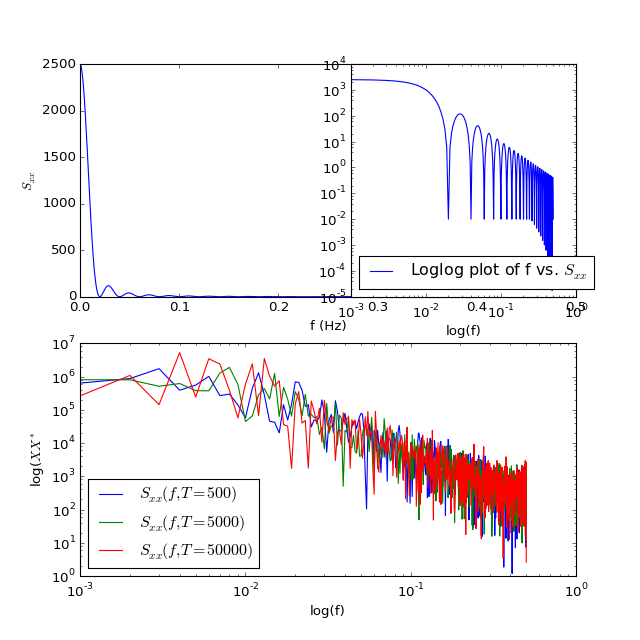

C:\Users\ldanyluk\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
# plot Sxx
import math as math
f=np.linspace(0, .5, 500)
b=50
Sxx= np.zeros(len(f))
for i in range(0, len(f)):
    Sxx[i]=2.*(2.*math.pi*f[i])**(-2.)*(1-math.cos(2.*math.pi*f[i]*b))
fig=plt.figure(figsize=(8, 8))
ax=fig.add_subplot(2,1,1)
ax.plot(f,Sxx, label='Plot of $S_{xx}(f)$')  
ax.set_xlabel('f (Hz)')
ax.set_ylabel('$S_{xx}$')
ax.legend(loc=0)
ax=fig.add_subplot(222)
ax.loglog(f,Sxx, label='Loglog plot of f vs. $S_{xx}$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')

#ax.set_ylabel('log($S_{xx}$)')
# make time series function
def mkx(N):
    y=np.random.randn(N)
    b=50
    barr=np.linspace(0,b-1,b)
    x=np.convolve(y,barr)
    return x
# make the fourier transform X
def mkX(x,dt,f): 
    X=1j*f*0.
    T=t[-1]-t[0]
    for ind, ff in enumerate(f):
        X[ind]= np.sum(x*np.exp(-1j*2.*np.pi*t*ff)*dt)/math.sqrt(T)# do sqrt so that when 
        # I take complex conjugate squared, I end up divinding by T
    return X # where X is the Fourier tranform

x=mkx(500)
t=np.linspace(0,len(x)-1, len(x))
dt=np.median(np.diff(t)) # so delta t =1.0 in our case
X=mkX(x,dt,f)
ax=fig.add_subplot(2,1,2)
ax.loglog(f,X*np.conj(X), label='$S_{xx}(f,T=500)$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($S_{xx}(f,T))')

x=mkx(5000)
t=np.linspace(0,len(x)-1, len(x))
dt=np.median(np.diff(t)) # so delta t =1.0 in our case
X=mkX(x,dt,f)
ax=fig.add_subplot(2,1,2)
ax.loglog(f,X*np.conj(X), label='$S_{xx}(f,T=5000)$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($S_{xx}(f,T))')

x=mkx(50000)
t=np.linspace(0,len(x)-1, len(x))
dt=np.median(np.diff(t)) # so delta t =1.0 in our case
X=mkX(x,dt,f)
ax=fig.add_subplot(2,1,2)
ax.loglog(f,X*np.conj(X), label='$S_{xx}(f,T=50000)$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

<IPython.core.display.Javascript object>


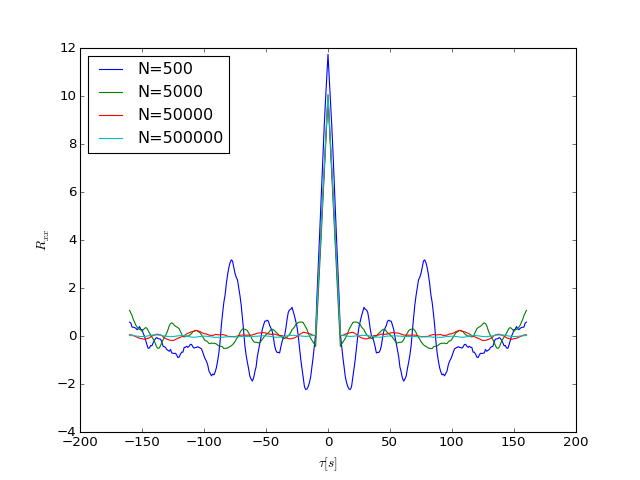

C:\Users\ldanyluk\Anaconda\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


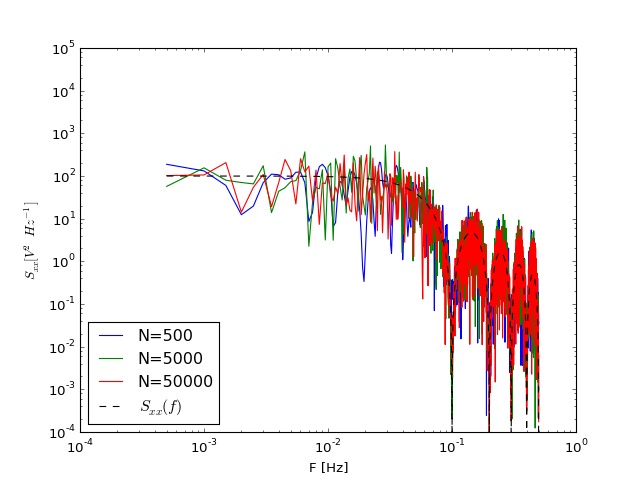

In [6]:
#ANSWER:::

fig,ax=plt.subplots()
for N in [500,5000,50000,500000]:
    b=10
    y = np.random.randn(N)
    x = np.convolve(y,np.ones(b),mode='valid')
    #x=x-np.mean(x)
    taus = np.arange(-b-150,b+150.1,1.)
    R=0.*taus
    for ind,tau in enumerate(taus):
        if np.abs(tau)>0:
            if tau<0:
                tau=-tau
            R[ind]=np.mean(x[np.floor(tau):]*x[:-np.floor(tau)])
        else:
            R[ind]=np.mean(x*x)
    ax.plot(taus,R,label='N=%d'%N)
ax.set_xlabel(r'$\tau [s]$')
ax.set_ylabel(r'$R_{xx}$')
ax.legend(loc=2)

def dft(x,dt,f):
    t = dt*np.arange(0,len(x))
    T,F=np.meshgrid(t,f)
    # make the fourier matrices
    E = np.exp(-1j*2*np.pi*T*F)
    X = dt*np.dot(E,x)
    return X

fit,ax=plt.subplots(1,1)
f = np.linspace(0,0.5,1000.)
for N in [500,5000,50000]:
    X = dft(x[:N],1.,f)
    ax.loglog(f,np.real(np.conj(X)*X)/N,label='N=%d'%N)
ax.loglog(f,(b*np.sinc(f*b))**2,'k--',label=r'$S_{xx}(f)$')
ax.set_ylim([1e-4,1e5]);ax.set_xlabel('F [Hz]');ax.set_ylabel(r'$S_{xx} [V^2\,Hz^{-1}]$')
ax.legend(loc=3)

So as T (really N, which increases T( actually, the T values are 548, 5048, 50048 ???) increases, there is no improvement in the plot. 

**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.

In [7]:
#using the x array made last, with 50000points, now divide it into smaller, same sized  segments. And increase these segments

def brkupx(numseg,x):
    #break up x into numseg number of segments: 
    seglen=len(x)/numseg
    newx=np.zeros(shape=(numseg, seglen))
    w=0
    for i in range(numseg):
        newx[i]= x[w*seglen:(w+1)*seglen]
        w=w+seglen
    return newx

a=[1,2,3,4,5,6,7,8,9,10]


def mkX(x,dt,f): 
    X=1j*f*0.
    T=t[-1]-t[0]
    for ind, ff in enumerate(f):
        X[ind]= np.sum(x*np.exp(-1j*2.*np.pi*t*ff)*dt)# where X is the Fourier tranform
        Sxx=X*np.conj(X)/T  # absolute value/by T
    return Sxx

def avgSegs(newx,dt,f):
    count=0
    numseg=len(newx)
    for i in range(5):
        absX=mkX(newx[i],dt,f)
        count=count+absX  
    avg=count/len(newx)
    return avg

#first do with one segment, as done above
fig=plt.figure(figsize=(10,7))
#t=np.linspace(0,len(x)-1, len(x)) this is wrong, makes a continuus fcn
t=np.arrange(0,len(x)-1, len(x))

dt=np.median(np.diff(t)) # so delta t =1.0 in our case
X=mkX(x,dt,f)
ax=fig.add_subplot(1,1,1)
ax.loglog(f,X*np.conj(X), label='$navg=1$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

#now do for 5 segments, using methods
newx5=brkupx(5,x)
t=np.linspace(0,len(newx5[0])-1, len(newx5[0]))
dt=np.median(np.diff(t))
navg=avgSegs(newx5, dt, f)

ax=fig.add_subplot(1,1,1)
ax.loglog(f,navg, label='$navg=5$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

# now for 50 segments
newx50=brkupx(50,x)
t=np.linspace(0,len(newx50[0])-1, len(newx50[0]))
dt=np.median(np.diff(t))
navg50=avgSegs(newx50, dt, f)

ax=fig.add_subplot(1,1,1)
ax.loglog(f,navg50, label='$navg=50$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

# now for 100 segments
newx100=brkupx(100,x)
t=np.linspace(0,len(newx100[0])-1, len(newx100[0]))
dt=np.median(np.diff(t))
navg100=avgSegs(newx100, dt, f)

ax=fig.add_subplot(1,1,1)
ax.loglog(f,navg100, label='$navg=100$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

# now for 500 segments
newx500=brkupx(500,x)
t=np.linspace(0,len(newx500[0])-1, len(newx500[0]))
dt=np.median(np.diff(t))
navg500=avgSegs(newx500, dt, f)

ax=fig.add_subplot(1,1,1)
ax.loglog(f,navg100, label='$navg=500$')
ax.legend(loc=0)
ax.set_xlabel('log(f)')
ax.set_ylabel('log($X X^*$')

<IPython.core.display.Javascript object>

ValueError: could not broadcast input array from shape (0) into shape (10009)

Note first that for navg=100 and navg=500, the curves are overlapping. 
I don't know if this is correct as I expected all the curves to overlap, but this shows that as I break up the randomly distrubuted time series into smaller and smaller segments, the Spectral density does approach a certain shape. This also indicates that since the time series x(t) is random, each segment is random too and thus has a similar $S_{xx}$, despite the fact that they are non overlapping. 